In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [4]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

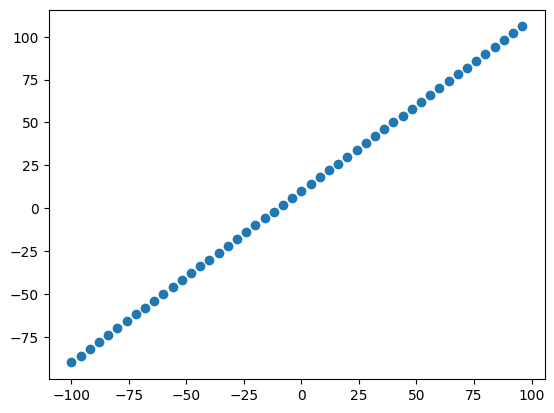

In [5]:
plt.scatter(X,y)
plt.show()

In [6]:
len(X), len(y), 

(50, 50)

In [7]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [8]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [88]:
# Let's Build a model

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer_1"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="Tensorflow_30")

# 2. Compile the model
model.compile(loss=tf.losses.mae,
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [89]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [90]:
model.summary()

Model: "Tensorflow_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 input_layer_1 (Dense)       (None, 100)               10100     
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the foorm of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [91]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 31ms/step


array([[ 69.30146 ],
       [ 73.267265],
       [ 77.233055],
       [ 81.19887 ],
       [ 85.16466 ],
       [ 89.13047 ],
       [ 93.09626 ],
       [ 97.062065],
       [101.02786 ],
       [104.99366 ]], dtype=float32)

In [92]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Note:**   If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [93]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    # Plot training data, test data and compares predictins to ground truth labels
    
    plt.figure(figsize=(15,10))
    
    # plot the training data in magenta
    plt.scatter(train_data, train_labels, c="m", label="Training Data")
    
    #plot the testing data in cyan
    plt.scatter(test_data, test_labels, c="cyan", label="Testing Data")
    
    # plot the predictions isn orange
    plt.scatter(test_data, predictions, c="orange", label="Prediction")
    
    # Show legend
    plt.legend()
    
    # Show Plot
    plt.show() 

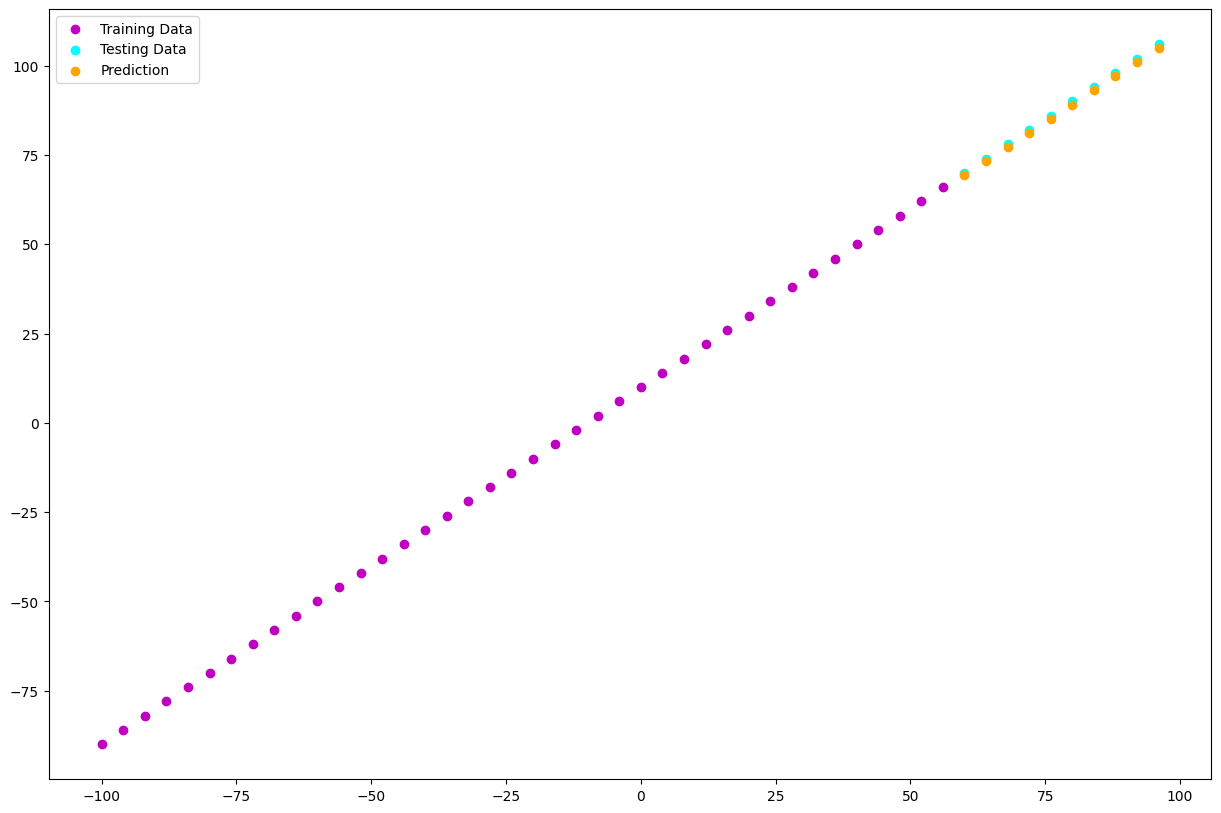

In [94]:
plot_predictions()

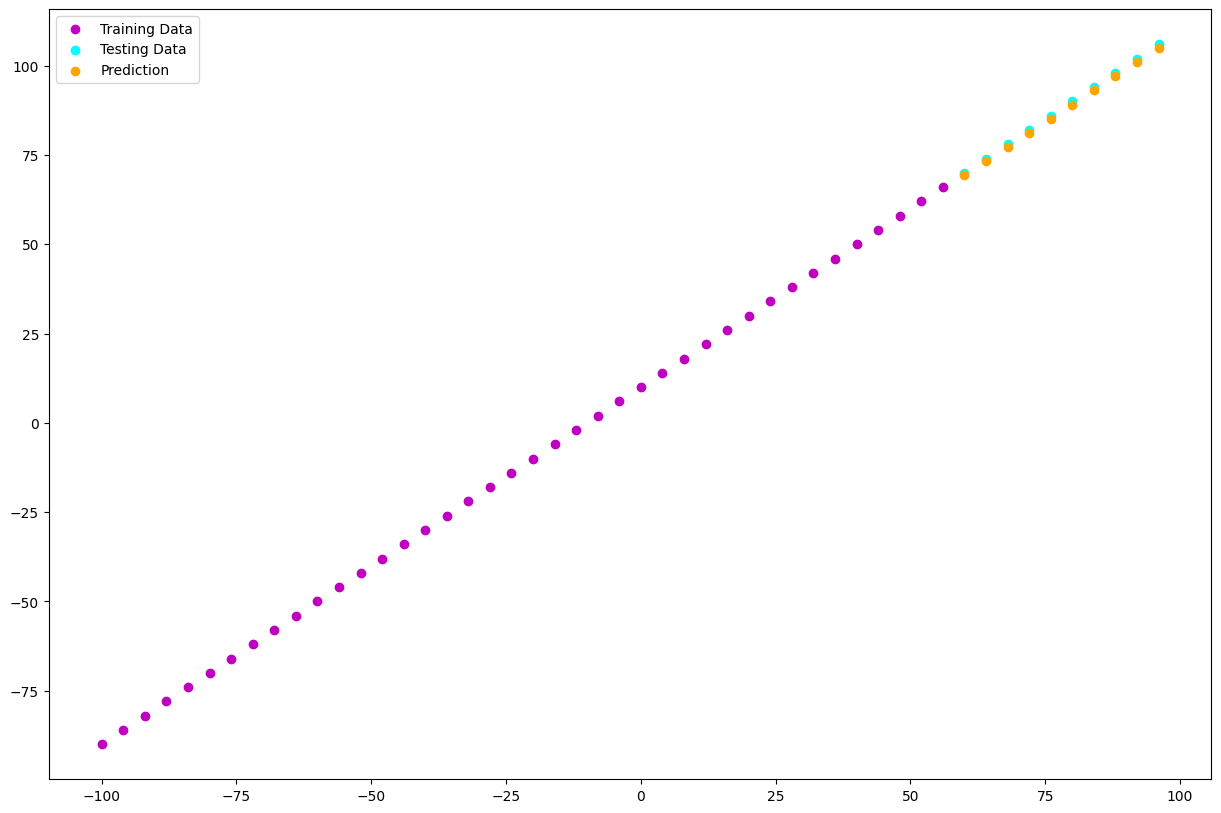

In [95]:
# For completeness
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)